# Problem Statement

As a member of the Data Science team at Ad Ease, a company specializing in cost-effective advertising solutions, my role is crucial. Our
company offers a unique ad infrastructure supported by three AI modules: Design, Dispense, and Decipher, which together create a
comprehensive digital advertising process. My current project involves analyzing per-page view reports of various Wikipedia pages over a
period of 550 days. With data on 145,000 Wikipedia pages, including their daily view counts, my task is to forecast future page views. This
forecasting is vital for predicting and optimizing ad placement for our diverse clientele, who require insights into ad performance across pages
in multiple languages. My goal is to ensure that our clients' ads are placed on the most relevant and high-traffic pages, thereby maximizing their
reach and effectiveness in different regional and linguistic markets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set_style('white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.rcParams['date.autoformatter.day'] = '%d-%b'
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!gdown 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=9535c1cc-8ff6-47d6-b4ae-b66fa9deba2b
To: /content/train_1.csv
100% 278M/278M [00:03<00:00, 72.1MB/s]


In [4]:
!gdown 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 3.33MB/s]


In [5]:
!ls

drive  Exog_Campaign_eng  sample_data  train_1.csv


In [16]:
df = pd.read_csv('train_1.csv').reset_index(drop= True)
df.fillna(0, inplace= True)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [17]:
def extract_language(title):
# Split the title on underscores and extract the second last part
  return title.split('.wikipedia')[0][-2:]

df['language']= df['Page'].apply(extract_language)
df.drop(columns= 'Page', inplace= True)
df_agg= df.pivot_table(columns= ['language'], aggfunc= 'mean')
df_agg= df.groupby('language').mean().transpose()

In [18]:
df_agg.rename_axis('date', axis='columns', inplace= True)

df_agg

date,de,en,er,es,fr,ja,ru,ts,zh
2015-07-01,714.968405,3513.424993,9.147976,1085.972919,475.150994,580.647056,629.999601,107.069205,240.582042
2015-07-02,705.229741,3502.075609,14.485342,1037.814557,478.202000,666.672801,640.902876,110.635384,240.941958
2015-07-03,676.877231,3324.944133,14.229642,954.412680,459.837659,602.289805,594.026295,104.404751,239.344071
2015-07-04,621.145145,3461.623491,12.299907,896.050750,491.508932,756.509177,558.728132,89.066549,241.653491
2015-07-05,722.076185,3575.075152,18.093299,974.508210,482.557746,725.720914,595.029157,97.296444,257.779674
...,...,...,...,...,...,...,...,...,...
2016-12-27,1085.095379,6039.929244,24.163797,1133.367901,858.413100,789.158680,1001.209426,186.035193,376.019618
2016-12-28,1032.640804,5859.498403,21.560959,1178.290923,774.155769,790.500465,931.987685,238.762137,378.048639
2016-12-29,994.657141,6244.350462,22.755700,1112.171085,752.712954,865.483236,897.282452,186.821898,350.719427
2016-12-30,949.265649,5201.135789,25.892508,821.671405,700.543422,952.018354,803.271868,208.542570,354.704452


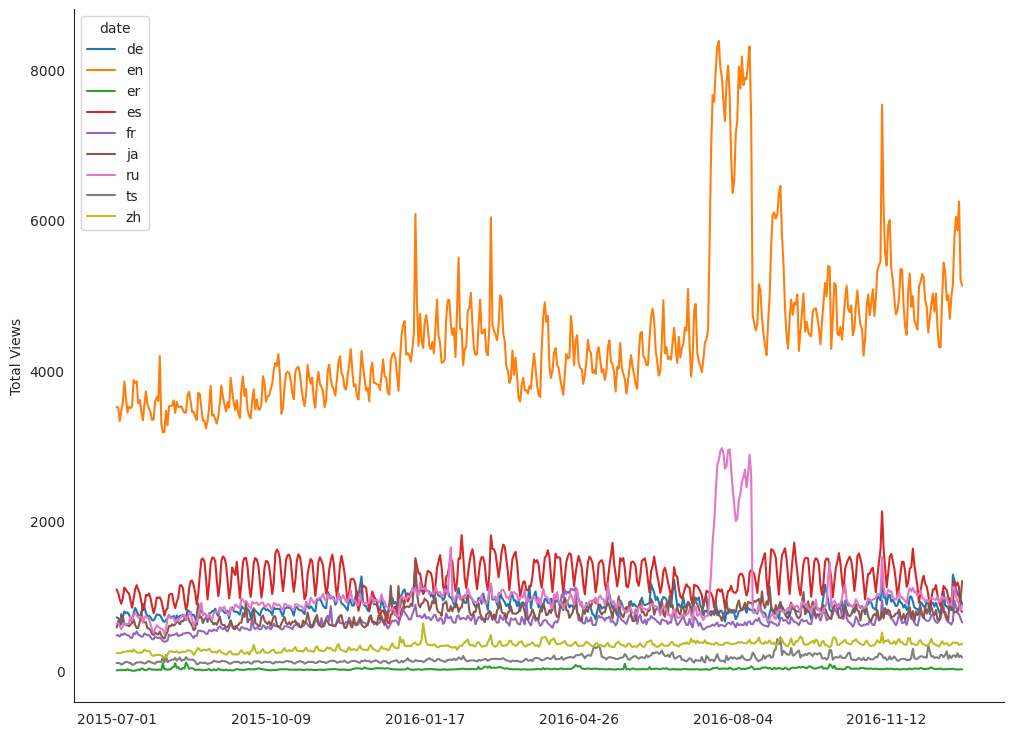

In [19]:
df_agg.plot(figsize= (12, 9))
plt.ylabel('Total Views')
sns.despine()
plt.show()

# English

We'll proceed with just English as it seems like this language has the most hits and widely used across the internet and make the process
simple for now.

In [20]:
eng= df_agg[['en']]
eng.head()

date,en
2015-07-01,3513.424993
2015-07-02,3502.075609
2015-07-03,3324.944133
2015-07-04,3461.623491
2015-07-05,3575.075152


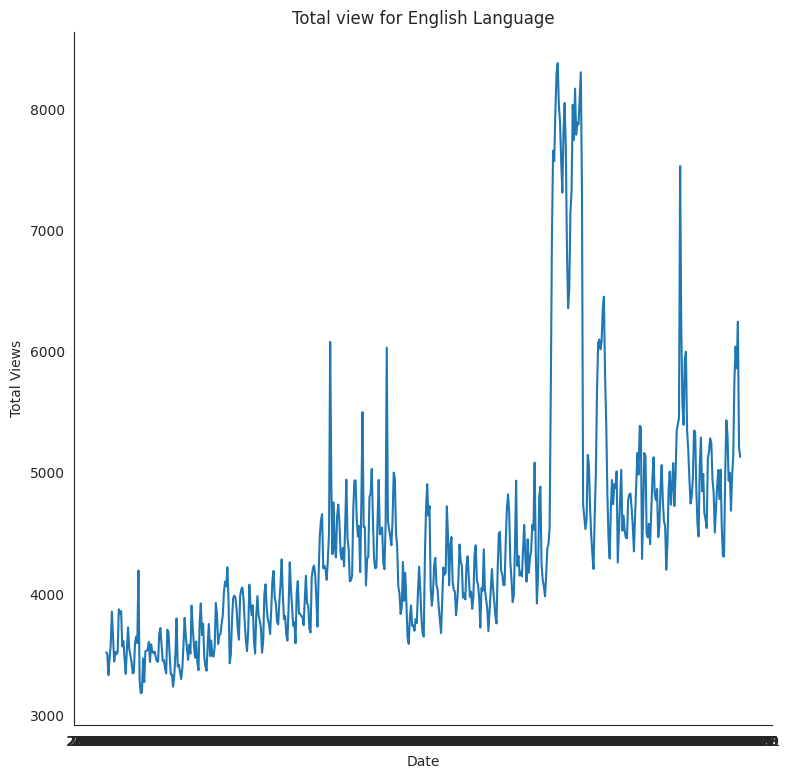

In [21]:
sns.lineplot(data= eng, x= eng.index, y= 'en')
sns.despine()
plt.title('Total view for English Language')
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.show()

Since the p-value is greater than 0.05, we can accept the null hypothesis that the time series is non-stationary

In [22]:
adfuller(eng)

(-2.2472894795137965,
 0.18953171039920302,
 14,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 7634.627993876331)

In [32]:
eng.head()

date,en
2015-07-01,3513.424993
2015-07-02,3502.075609
2015-07-03,3324.944133
2015-07-04,3461.623491
2015-07-05,3575.075152


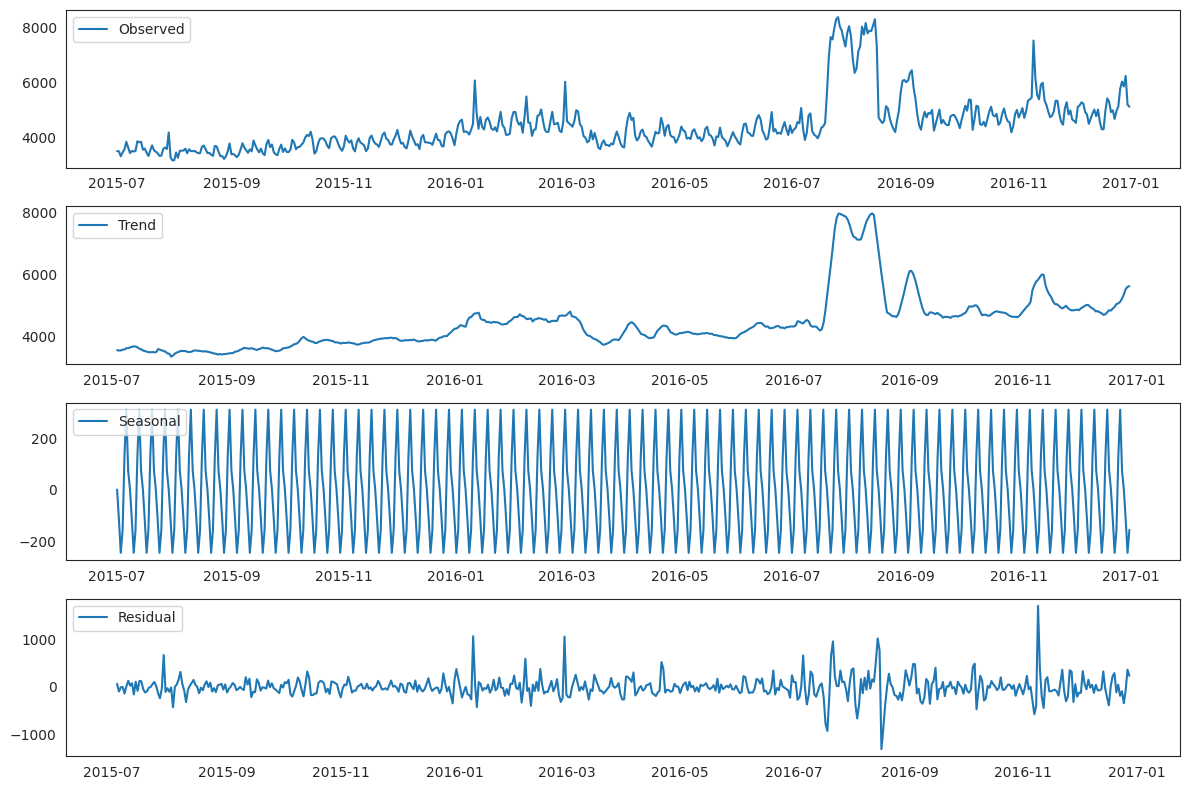

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'eng' has a DatetimeIndex
eng.index = pd.to_datetime(eng.index)

# Try a shorter period, e.g., 7 for weekly seasonality if the data is daily
decomposed = seasonal_decompose(eng, model='additive', period=7)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposed.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposed.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposed.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposed.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Running an ADF test on residual from the decomposition above returns and very small p-value indicating we can reject the null hypothesis that
the residual time series is non-stationary

In [34]:
adfuller(decomposed.resid.fillna(0))

(-11.536269914038929,
 3.726849689055685e-21,
 17,
 532,
 {'1%': -3.442701754304053,
  '5%': -2.866988120523906,
  '10%': -2.5696716542766693},
 7086.464630069687)

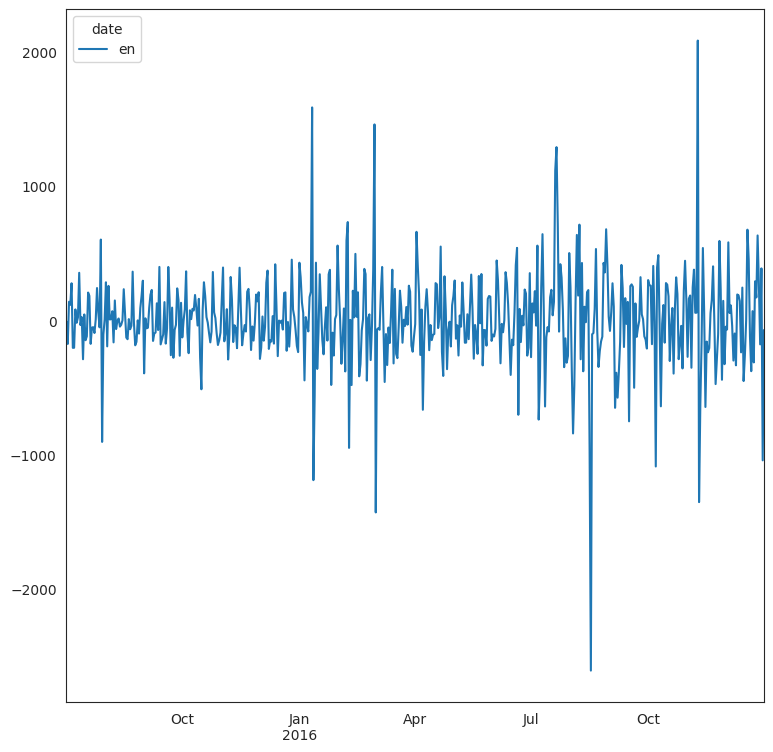

In [35]:
eng_diff= eng.diff().dropna()
eng_diff.plot()
plt.show()

Differenced time series for english has very low p-value and thus can reject the null hypothesis that the time series is non-stationary

In [36]:
adfuller(eng_diff)

(-8.254139420494855,
 5.292900142398324e-13,
 13,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 7624.430472641729)

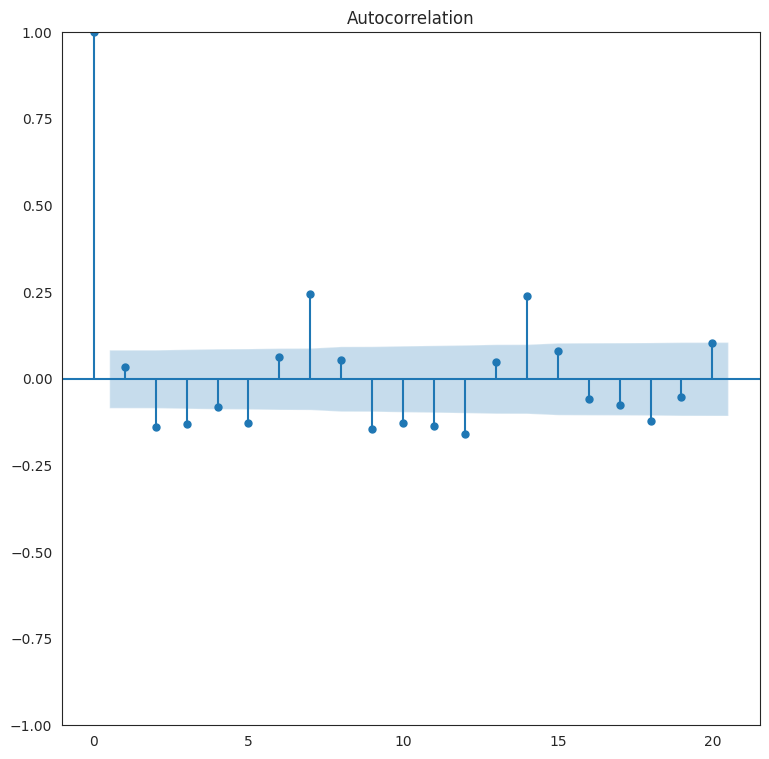

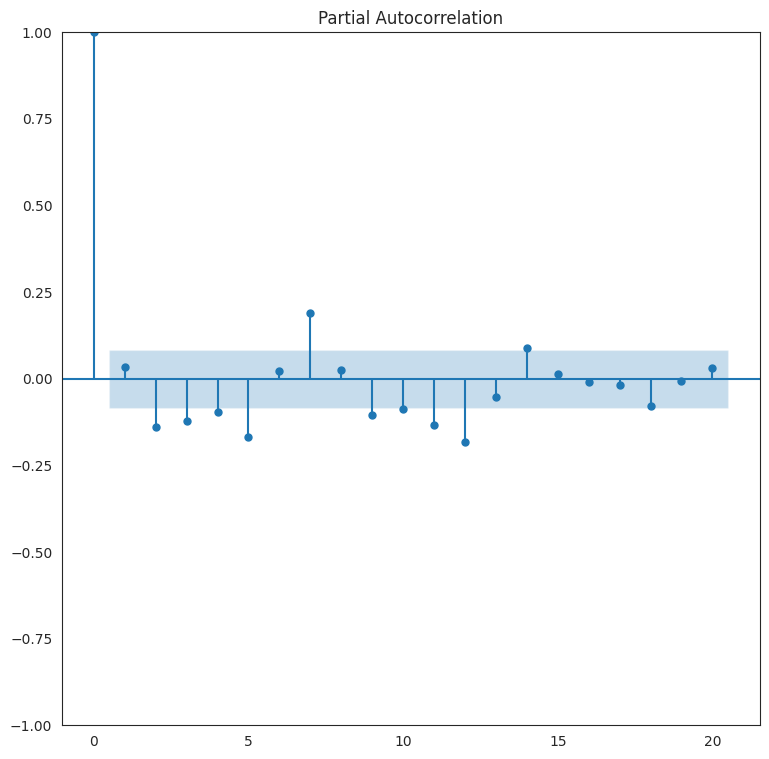

In [37]:
# Fitting an Arima Model
acf= plot_acf(eng_diff, lags= 20)
pacf= plot_pacf(eng_diff, lags= 20)

In [38]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(eng_diff, order= (4, 1, 3))
results= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

<ipython-input-40-d37f26ad69a3>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[0]= forecasts[0] + eng.iloc[-1]
<ipython-input-40-d37f26ad69a3>:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  forecasts[0]= forecasts[0] + eng.iloc[-1]


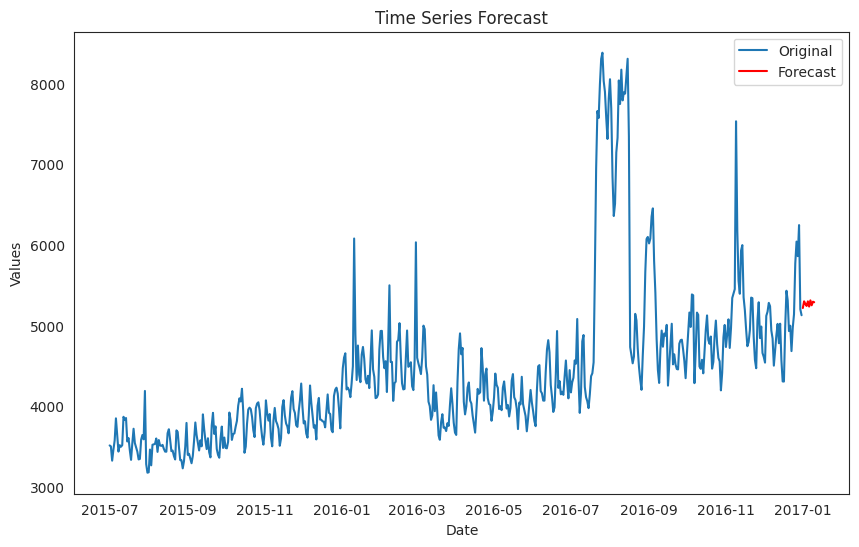

In [40]:
forecast= results.get_forecast(steps= 10)
eng_last_value= eng.iloc[-1]
forecasts= forecast.predicted_mean
forecasts[0]= forecasts[0] + eng.iloc[-1]
forecasts= forecasts.cumsum()
# confidence_invtervals= forecast.conf_int()
forecast_dates = pd.date_range(start= eng.index[-1], periods= 11, inclusive= 'right')
plt.figure(figsize= (10, 6))
plt.plot(eng.index, eng, label= 'Original')
plt.plot(forecast_dates, forecasts, color= 'red', label= 'Forecast')
# plt.fill_between(forecasts,
# confidence_invtervals.iloc[:, 0],
# confidence_invtervals.iloc[:, 1],
# color= 'pink',
# alpha= 0.3)
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

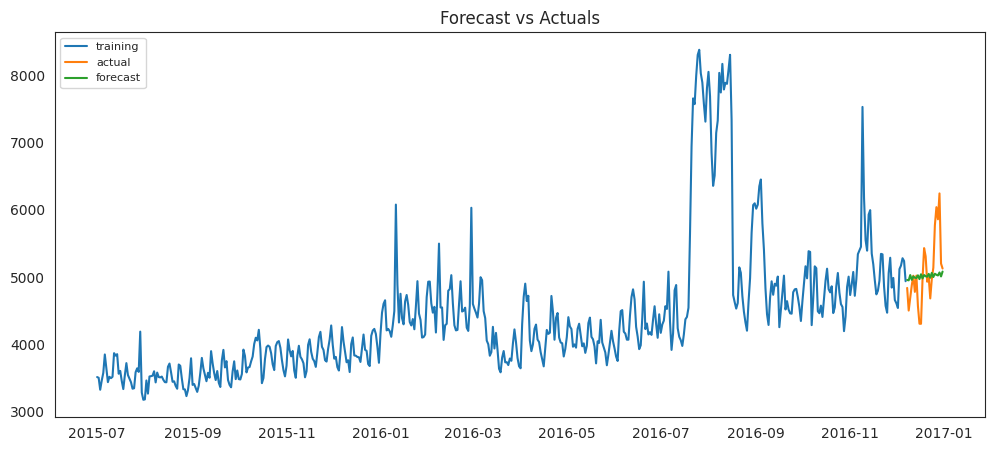

In [41]:
train= eng_diff[:-24]
test= eng_diff[-24:]

model = ARIMA(train, order= (4, 1, 3))
fitted = model.fit()
fc_series= fitted.get_forecast(steps= 24, alpha= 0.2).predicted_mean
fc_series = pd.Series(fc_series, index=test.index)
fc_series[0]= fc_series[0] + eng[:-24].iloc[-1]
fc_series= fc_series.cumsum()
plt.figure(figsize=(12,5), dpi=100)
plt.plot(eng[:-24], label='training')
plt.plot(eng[-24:], label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [43]:
mape = np.mean(np.abs(fc_series.values - eng[-24:].values)/np.abs(eng[-24:].values))
rmse = np.mean((fc_series.values - eng[-24:].values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.07091029247464077
rsme: 499.9225158943391


In [44]:
ex_df= pd.read_csv('Exog_Campaign_eng')
exog= ex_df['Exog'].to_numpy()[1:]
exog.shape

(549,)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-45-859cc41b62e8>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fc_series[0]= fc_series[0] + eng[:-24].iloc[-1]
<ipython-input-45-859cc41b62e8>:9: FutureWarning: Series.

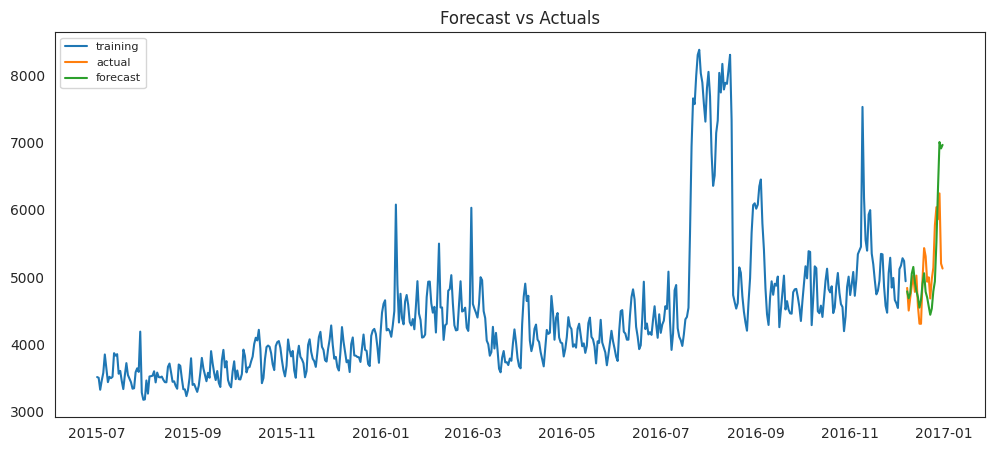

In [45]:
import statsmodels.api as sm
train= eng_diff[:-24]
test= eng_diff[-24:]
model=sm.tsa.statespace.SARIMAX(train, order=(4, 1, 3), seasonal_order=(1,1,1,7), exog=exog[:-24])
results=model.fit()
fc=results.get_forecast(24, dynamic=True, exog=pd.DataFrame(exog[-24:])).predicted_mean
# Make as pandas series
fc_series = pd.Series(fc)
fc_series[0]= fc_series[0] + eng[:-24].iloc[-1]
fc_series= fc_series.cumsum()
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(eng[:-24], label='training')
plt.plot(eng[-24:], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [46]:
mape = np.mean(np.abs(fc_series.values - eng[-24:].values)/np.abs(eng[-24:].values))
rmse = np.mean((fc_series.values - eng[-24:].values)**2)**.5

print("mape:",mape)
print("rsme:",rmse)

mape: 0.13131703353222382
rsme: 928.1900008232737


In [49]:
%%capture
!pip install pmdarima

In [50]:
from pmdarima import auto_arima

def optimized_grid_search(ts):
    model = auto_arima(ts[:-24],
                       seasonal=False,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True,
                       max_order=10)  # max_order controls the maximum sum of p, d, and q

    fc = model.predict(n_periods=24)
    mape = np.mean(np.abs(fc - ts[-24:].values) / np.abs(ts[-24:].values))

    return mape, model.order

Language:  de
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5895.971, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6024.145, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6007.964, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5975.814, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5900.501, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5899.010, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5895.675, Time=0.90 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5899.995, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=5890.967, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5895.973, Time=0.36 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=5828.557, Time=2.50 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=5877.840, Time=1.64 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=5822.097, Time=5.18 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=5876.990, Time=0.99 sec
 ARIMA(5,0,4)(0,0,0

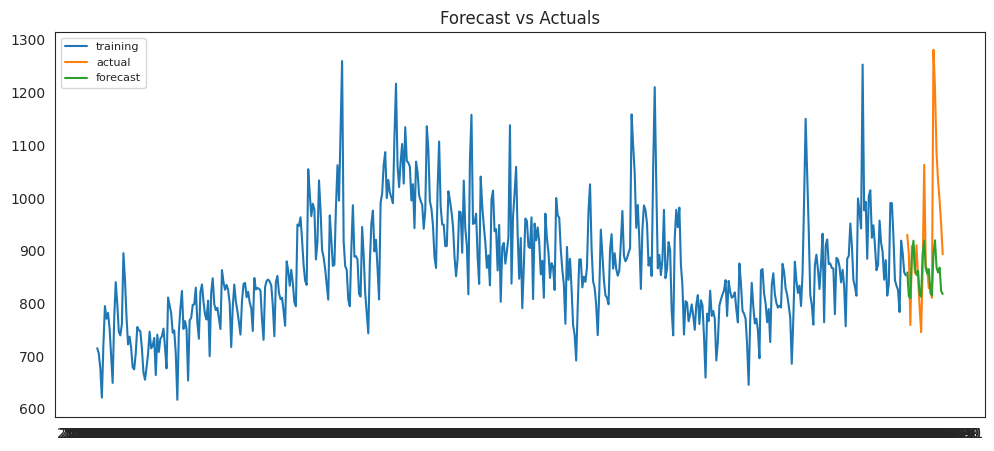

MAPE: 1.905424703553269
RMSE: 105.90385580015855
Language:  en
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7605.452, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7624.500, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7625.871, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7625.633, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7603.453, Time=0.66 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=7614.898, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7609.488, Time=0.91 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7605.673, Time=0.61 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=7605.215, Time=1.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7603.852, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7605.291, Time=0.52 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 8.908 seconds
Best ARIMA order: (1, 0, 2)


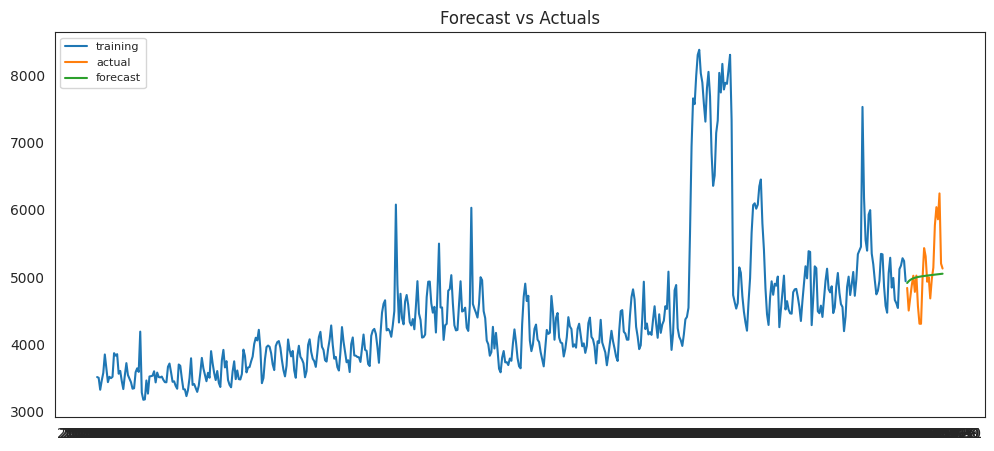

MAPE: 1.0903228841983992
RMSE: 375.3305521792024
Language:  er
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3989.114, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4139.349, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4055.179, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4006.143, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3988.598, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3994.124, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3989.112, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=2.01 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3987.012, Time=0.35 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=3987.735, Time=0.44 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=3989.555, Time=1.89 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3988.897, Time=1.13 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0]          
Total fit time: 6.874 seconds
Best ARIMA order: (0, 0, 3)


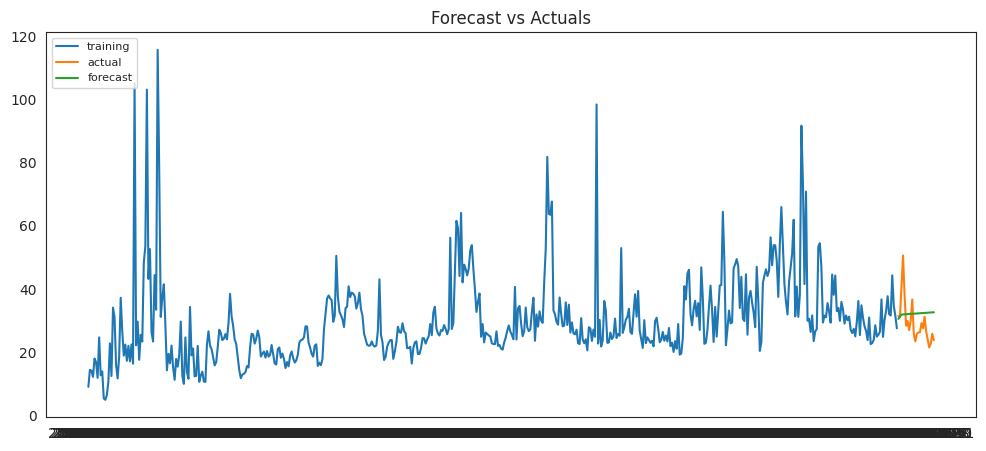

MAPE: 1.0268785535806366
RMSE: 5.406093328668524
Language:  es
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6291.274, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6783.160, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6728.961, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6681.809, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6564.456, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6445.739, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=6284.335, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=6425.129, Time=0.38 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=6174.322, Time=0.85 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=6335.554, Time=1.64 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=6175.594, Time=6.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=6191.679, Time=1.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=6292.518, Time=0.95 sec
 ARIMA(5,0,1)(0,0,0)[0]             

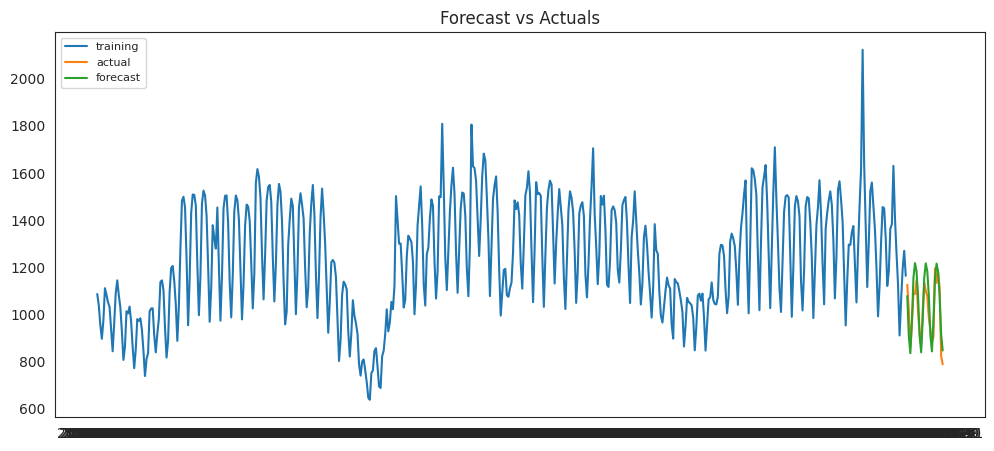

MAPE: 2.5029761586193584
RMSE: 73.27902623955742
Language:  fr
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5695.440, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5759.855, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5734.735, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5712.039, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5693.834, Time=0.72 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5692.607, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5694.091, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5692.971, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5695.688, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5694.457, Time=0.37 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 4.636 seconds
Best ARIMA order: (0, 0, 2)


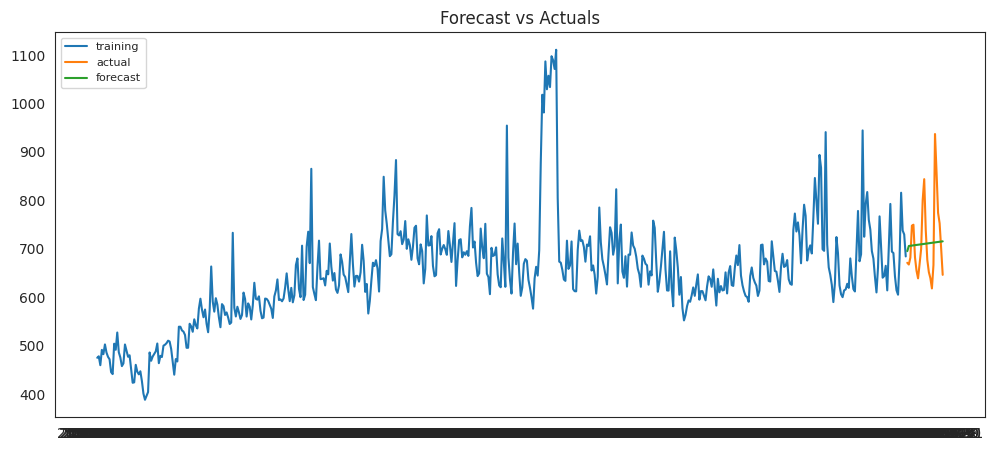

MAPE: 1.1509847673322826
RMSE: 75.17400918411205
Language:  ja
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6049.755, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6180.377, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6151.701, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6108.598, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6051.667, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6050.114, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=6050.642, Time=2.93 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5987.085, Time=5.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=6051.363, Time=0.93 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.21 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=1.36 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=6049.849, Time=0.60 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=5983.463, Time=1.46 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf,

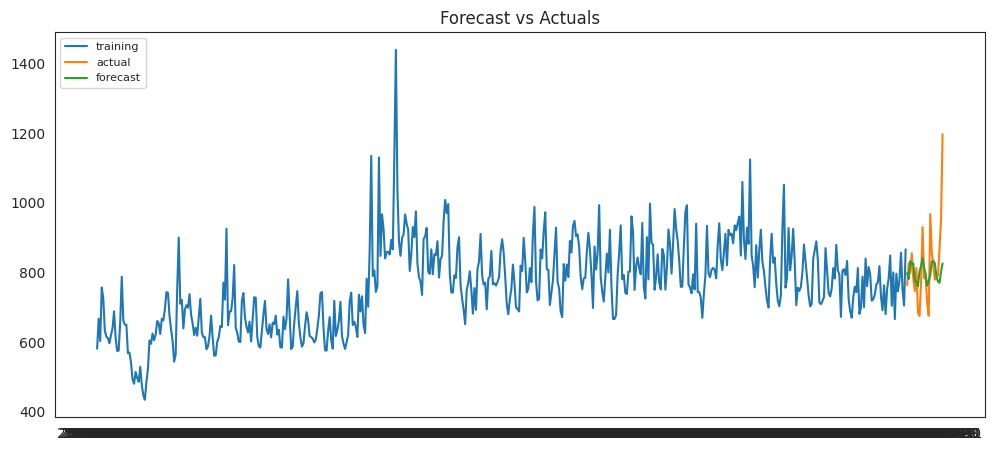

MAPE: 2.0170897666585605
RMSE: 102.51930231999343
Language:  ru
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6530.478, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6542.735, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6540.108, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6538.324, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6533.765, Time=2.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6532.872, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=6529.655, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=6534.340, Time=0.34 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=6529.280, Time=1.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=6535.543, Time=0.25 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=1.43 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=1.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=6531.841, Time=2.36 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=653

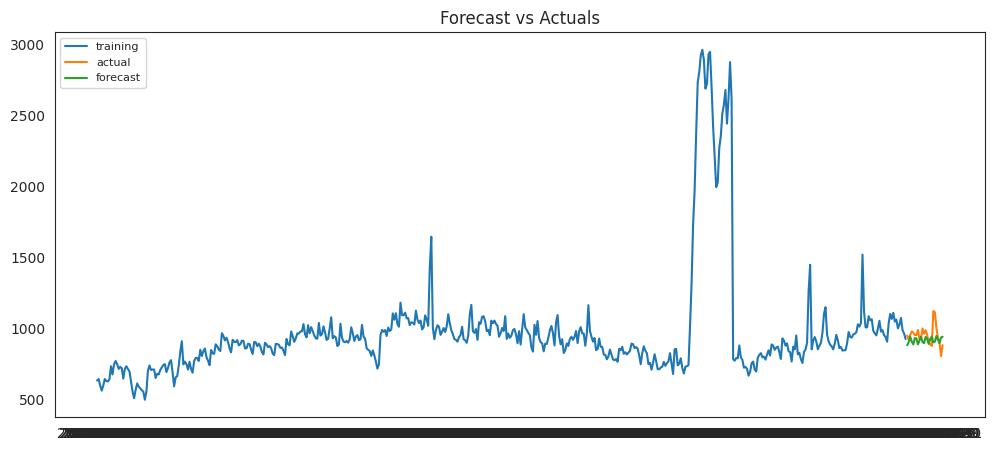

MAPE: 2.0637854074214914
RMSE: 85.9430727259923
Language:  ts
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4924.509, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5009.873, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4971.130, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4954.962, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4924.042, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4939.650, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4924.161, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4928.468, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4926.628, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4923.740, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4965.004, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4925.179, Time=1.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4952.551, Time=1.00 sec
 ARIMA(3,0,2)(0,0,0)[0]             :

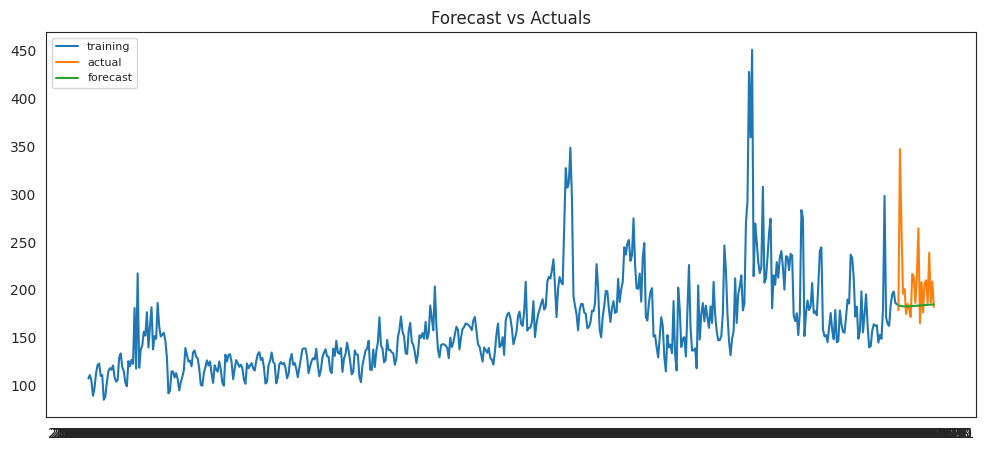

MAPE: 0.9945199107718877
RMSE: 53.19720630044035
Language:  zh
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4976.044, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5101.833, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5101.756, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5099.611, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4983.844, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4977.378, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4977.448, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4950.086, Time=0.97 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4981.172, Time=1.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4904.340, Time=6.20 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=4962.791, Time=1.70 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=1.53 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=4910.941, Time=1.35 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC

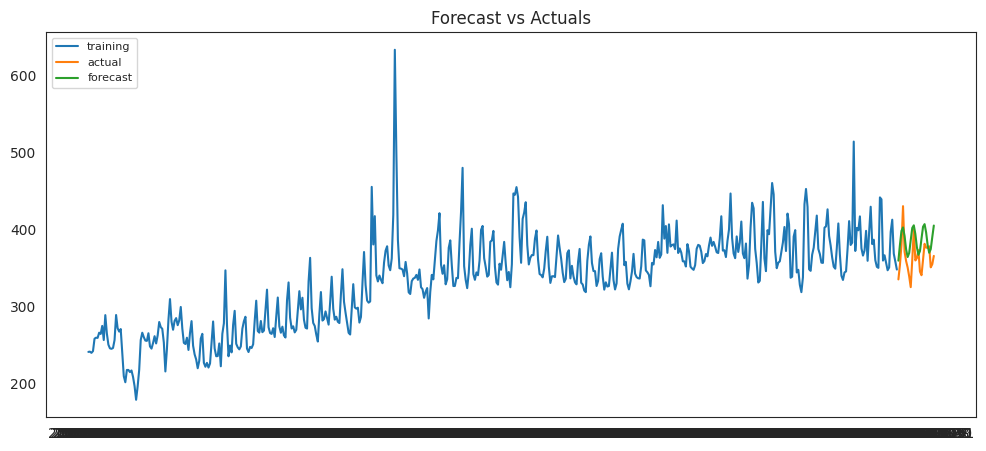

MAPE: 3.1273165199112434
RMSE: 23.37143473289552


In [51]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def all_arima(train, test, val):
    model = ARIMA(train, order=(val[0], val[1], val[2]))
    fitted = model.fit()

    # Forecast
    fc = fitted.get_forecast(24, alpha=0.02).predicted_mean
    fc_series = pd.Series(fc, index=test.index)
    fc_series[0] = fc_series[0] + df_agg[c][:-24].iloc[-1]
    fc_series = fc_series.cumsum()

    # Plot
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(df_agg[c][:-24], label='training')
    plt.plot(df_agg[c][-24:], label='actual')
    plt.plot(fc_series, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    mape = np.mean(np.abs(fc - test.values) / np.abs(test.values))
    rmse = np.mean((fc - test.values) ** 2) ** 0.5
    print("MAPE:", mape)
    print("RMSE:", rmse)

    return fc_series

# Function to automatically find the best ARIMA order
def optimized_grid_search(ts):
    model = auto_arima(ts[:-24],
                       seasonal=False,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True,
                       max_order=10)

    return model.order

# Main prediction loop
df_diff = df_agg.diff().dropna()
import warnings
warnings.filterwarnings("ignore")
views_prediction = {}

for c in df_diff:
    print("Language: ", c)
    ts = df_diff[c]

    # Get best ARIMA order using optimized grid search
    val = optimized_grid_search(ts)
    print("Best ARIMA order:", val)

    train = ts[:-24]
    test = ts[-24:]

    # Generate forecast and store predictions
    fc = all_arima(train, test, val)
    views_prediction[c] = fc
